In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
transactions = pd.read_csv("../data/cleaned/transactions_cleaned.csv")
ab_test = pd.read_csv("../data/ab_test_data.csv")
cohorts = pd.read_csv("../data/cohort_analysis.csv")
anomalies = pd.read_csv("../data/anomalies_detected.csv")
feature_adoption = pd.read_csv("../data/feature_adoption.csv")
user_segments = pd.read_csv("../data/user_segments.csv")

In [5]:
print("=== KPI Overview ===")
print("Total User:", transactions['user_id'].nunique())
print("Total number of transactions:", transactions.shape[0])
print("Total transaction amount:", transactions['amount'].sum())

=== KPI Overview ===
Total User: 1907
Total number of transactions: 5997
Total transaction amount: 165268.56


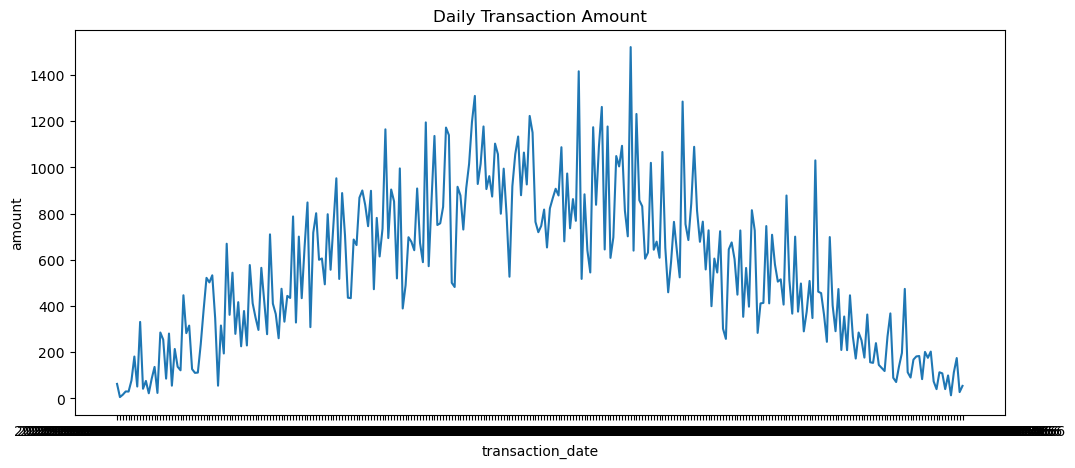

In [8]:
# Daily Transaction Trend
daily_tx = transactions.groupby('transaction_date')['amount'].sum().reset_index()
plt.figure(figsize=(12,5))
sns.lineplot(data=daily_tx, x='transaction_date', y='amount')
plt.title("Daily Transaction Amount")
plt.show()


In [11]:
print("Number of anomaly detections:", anomalies.shape[0])
if not anomalies.empty:
    print(anomalies)


Number of anomaly detections: 6
             transaction_date  daily_total   z_score  is_anomaly
0  2025-07-06 08:04:50.974356      1309.61  2.242445        True
1  2025-08-11 08:04:50.974356      1416.17  2.562129        True
2  2025-08-19 08:04:50.974356      1261.89  2.099283        True
3  2025-08-29 08:04:50.974356      1521.08  2.876863        True
4  2025-08-31 08:04:50.974356      1231.45  2.007962        True
5  2025-09-16 08:04:50.974356      1285.11  2.168944        True


In [14]:
# 6. A/B Test Summary
ab_summary = ab_test.groupby('group')['converted'].mean().reset_index()
print("A/B Test Retention 7d:\n", ab_summary)

A/B Test Retention 7d:
        group  converted
0    control   0.115268
1  treatment   0.138203


In [16]:
# 7. Cohort Analysis Summary
print("Cohort Analysis")
print(cohorts)

Cohort Analysis
                        first_tx  cohort_day  active_users
0     2025-03-03 08:04:50.974356           0             2
1     2025-03-03 08:04:50.974356          33             1
2     2025-03-03 08:04:50.974356          68             1
3     2025-03-03 08:04:50.974356          98             1
4     2025-03-04 08:04:50.974356           0             1
...                          ...         ...           ...
3913  2025-12-01 08:04:50.974356           0             1
3914  2025-12-07 08:04:50.974356           0             1
3915  2025-12-09 08:04:50.974356           0             1
3916  2025-12-10 08:04:50.974356           0             1
3917  2025-12-22 08:04:50.974356           0             1

[3918 rows x 3 columns]
